---
# Introduction
---
### Hello world!

`tf.constant`: A tensor flow constant! Can be a string, number or a tensor. Once the value for a constant is set, it can never change!

---

In [147]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create a tensorflow constant
hello = tf.constant("Hello World!")
# Print this variable as is
print(hello)

Tensor("Const_32:0", shape=(), dtype=string)


*Oops! That is not what we wanted! This is because the variable `hello` hasn't been evaluated yet. Tensorflow needs a **session** to run the graph in!*

---

In [148]:
# Create a new session
sess = tf.Session()
# Print the constant
print("Printing using Session.run()")
print(sess.run(hello))
# Also
print("Printing using eval() function")
print(hello.eval(session=sess))

Printing using Session.run()
b'Hello World!'
Printing using eval() function
b'Hello World!'


### Tensorflow math operations!

In [149]:
# run addition and multiplication operations

a = tf.constant(25, tf.float32)
b = tf.constant(5, tf.float32)

with tf.Session() as sess:
    print("A = %f"%sess.run(a))
    print("B = %f"%sess.run(b))
    print("A + B = %f"%sess.run(a+b))
    print("A * B = %f"%sess.run(a*b))
    print("A / B = %f"%sess.run(a/b))
    print("A + B using tf add = %f"%sess.run(tf.add(a, b)))
    print("A * B using tf multiply = %f"%sess.run(tf.multiply(a, b)))

A = 25.000000
B = 5.000000
A + B = 30.000000
A * B = 125.000000
A / B = 5.000000
A + B using tf add = 30.000000
A * B using tf multiply = 125.000000


---
*Tensorflow **placeholder** is a promise to provide a value later (supplied/fed at execution time). For placeholders, an optional argument `shape` can be used to make sure the input dimensions matches the required tensor dimensions.*

*If this is missing or `None` (default), then the placeholder can accept any shape.*

In [150]:
# Run addition and multiplication with placeholders

c = tf.placeholder(tf.float32, shape=())
d = tf.placeholder(tf.float32, shape=())

sum = tf.add(c, d)
prod = tf.multiply(c, d)

with tf.Session() as sess:
    
    print("Operations by feeding values")
    print("C = %f"%sess.run(c, feed_dict={c: 4}))
    print("D = %f"%sess.run(d, feed_dict={d: 6}))
    print("Sum = %f"%sess.run(sum, feed_dict={c: 4, d: 6}))
    print("Prod = %f"%sess.run(prod, feed_dict={c: 4, d: 6}))

Operations by feeding values
C = 4.000000
D = 6.000000
Sum = 10.000000
Prod = 24.000000


In [151]:
# Matrix operations with placeholders

mat1 = tf.placeholder(tf.float32, shape=(2,2))
mat2 = tf.placeholder(tf.float32, shape=(2,1))

matmul = tf.matmul(mat1, mat2)

with tf.Session() as sess:
    print("Matrix multiplication using python lists as feed dict values")
    print(sess.run(matmul, feed_dict={ mat1: [[1,2],[2,1]], mat2: [[1],[2]]}))
    print("Matrix multiplication using numpyarrays as feed dict values")
    print(sess.run(matmul, feed_dict={ mat1: np.array([[1,2],[2,1]]), mat2: np.array([[1],[2]])}))

Matrix multiplication using python lists as feed dict values
[[ 5.]
 [ 4.]]
Matrix multiplication using numpyarrays as feed dict values
[[ 5.]
 [ 4.]]


---
## Linear Regression - Lets fit a line!
---

Lets create some data with a linear relationship. 

For this example, lets use **`slope = 0.8`** and **`bias = 5`** _i.e. Y = 0.8 \* X + 5_

Lets also add some random noise sampled from a Gaussian with `mean = 0` and `std = 5`

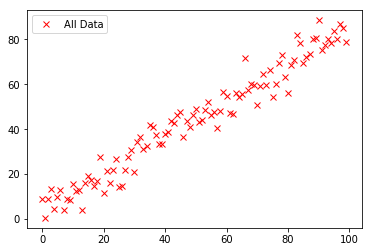

In [152]:
num_points = 100
X = np.arange(num_points)
Y = (X * 0.8 + 5) + np.random.normal(0, 5, num_points)
# Plot the points
plt.plot(X, Y, 'rx', label="All Data")
plt.legend()
plt.show()

Now lets start to build our linear regression model. First lets set some hyperparameters. We'll need a learning rate for gradient descent and number of epochs over the dataset

In [180]:
# Hyperparameter
learning_rate = 0.0006
epochs = 1000

Next, lets create a tensorflow graph that defines a simple single variable linear regression model that uses squared loss and gradient descent optimization.

* **Step 1**: Lets create placeholders for the input variable `x` and the output variable `y`. Note that the shape has been explicitly mentioned. This is not necessary however.

In [174]:
# First create placeholders for the input and output
# These placeholders will be later supplied with the data we created at execution time
x = tf.placeholder(tf.float64, shape=(num_points,))
y = tf.placeholder(tf.float64, shape=(num_points,))

* **Step 2**: Now create tensorflow *Variables* for the Weight and Bias that have to be learned. *Variables* allow for its value to be changed at execution time. Since our parameters are to be "learned" and is updated after every epoch, we need to use *Variables* for the weight and bias term.

  Variables **MUST** be supplied with an initial value that can be a tensor or a python object convertible to a tensor. It can also optionally take in the data type and a name (commonly used) among other parameters.

In [175]:
# Create variables to hold the weight and bias
W = tf.Variable(0.1, dtype=tf.float64, name="weight")
b = tf.Variable(0.1, dtype=tf.float64, name="bias")

* **Step 3**: Lets create our linear model and define our loss function

In [176]:
# The linear model to compute Y
y_predicted = tf.add(tf.multiply(W, x), b)

# Compute all the deltas between the computed y and the actual Y and square the errors
squared_deltas = tf.square(tf.subtract(y_predicted, y))

# Aggregate all the deltas over all the examples and divide its by the number of examples
loss = tf.divide(tf.reduce_sum(squared_deltas), 2*num_points)

* **Step 4**: Once the loss is computed, we now have to run the optimizer. We can use Gradient Descent

In [177]:
# Create a gradient descent optimizer with the set learning rate
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

# Run the optimizer to minimize loss
# Tensorflow automatically computes the gradients for the loss function!!!
train = optimizer.minimize(loss)

While constants are initialized, the Variables are not. To do this, we must explicitly call the `global_variables_initializer()` function.

In [178]:
# Initialize all variables
init = tf.global_variables_initializer()

* **Step 5**: Lets run the graph. First lets create a session and initialize the variables. After that, we will run gradient descent over the entire training set for the specified number of epochs. We will capture the variables of interest and print it out to monitor the optimization process.

  Note: Learning rates `0.0005`+ doesn't let the optimization converge. The weights/biases bounce between +/- values and increase infinity.
 
 
* **Step 6**: Plot the computed points as a line using the weight and bias terms, along with the original data points.

W: 0.8626 B: 0.6422 Loss: 14.4472


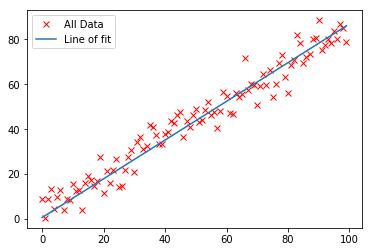

In [181]:
# Run the graph
with tf.Session() as sess:
    # Initialize all variables
    sess.run(init)
    
    # For each epoch
    for epoch in range(epochs):
        # Run the optimizer and get the loss 
        curr_W, curr_b, curr_loss, _  = sess.run([W, b, loss, train], feed_dict = {x: X, y: Y})
#         print("W: %.4f"%curr_W, "B: %.4f"%curr_b, "Loss: %.4f"%curr_loss)
    print("W: %.4f"%curr_W, "B: %.4f"%curr_b, "Loss: %.4f"%curr_loss)
    
    # Plot the points
    plt.plot(X, Y, 'rx', label="All Data")
    # Plot the computed points as a line
    plt.plot(X, curr_W * X + curr_b, label="Line of fit")
    plt.legend()
    plt.show()
    

And there you have it! The line fits! Playing with the hyperparameters can get better fits!

---
## Classification - MNIST dataset
---

Exploring the popular MNIST dataset.

In [160]:
from tensorflow.examples.tutorials.mnist import input_data

In [161]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Read in all the data into separate python variables

In [162]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

Let's view few random images and its label. 
* **Step 1**: Import the necessary packages

In [163]:
from PIL import Image, ImageOps
from matplotlib.pyplot import imshow

* **Step 2**: Create a function that takes in a normalized mnist numpy array, scales it up to grayscale and displays it inline

In [164]:
def show_mnist_image(image_array, label_array):  
    # Show the image label
    print("Image label: %d"%(label_array.argmax()))
    # Display the image inline
    pil_image = Image.fromarray(((image_array.reshape(28,28)) * 256).astype('uint8'), "L")
    %matplotlib inline
    imshow(ImageOps.invert(pil_image), cmap='gray')

* **Step 3**: Select a random image and display its label and the image

Image label: 8


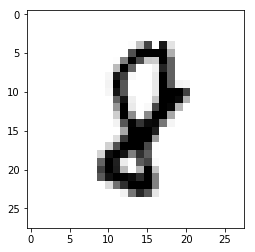

In [182]:
# Pull a random image
random_image_number = 200
random_image = X_train[random_image_number]
random_image_label = Y_train[random_image_number]

show_mnist_image(random_image, random_image_label)

---
## Basic Models
---

### 1. Nearest Neighbors
---

Build a nearest neighbors classifier using a subset of mnist data

In [166]:
# Read only a subsample
Xtr, Ytr = mnist.train.next_batch(5000)
Xte, Yte = mnist.test.next_batch(200)

In [167]:
# Create placeholders
xtr = tf.placeholder(tf.float32, shape=(None, 784))
xte = tf.placeholder(tf.float32, shape=[784])

* 1) `tf.substract`: This takes in an array with any number of rows and 784 columns (xtr) and a vector of only 784 elements and subtracts. The operation is a **broadcast** operation where each row of `xtr` is subtracted by xte.
* 2) `tf.square`: This performs elementwise squaring for each of the difference
* 3) `tf.reduce_sum`: This reduces the `784` columns to a single column by summing them all along the first axis.
* 4) `tf.srqt`: This computes the square root to return the distance. Now *distance* is a column of individual distances.
* 5) `pred`: use arg_min to get the index of the closest training example 

In [168]:
# Create L2 distance for all the images
distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(xtr, xte)), axis=1))
# Prediction is the image with the lowest distance
nearest_neighbor = tf.arg_min(distance, 0)

accuracy = 0

# Initializing global variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Run initialization
    sess.run(init)
    
    # Loop over all the test data
    for i in range(len(Xte)):
        # Get the nearest neighbor, i.e the row number/example number from the training dataset
        nearest_neighbor_index = sess.run(nearest_neighbor, feed_dict={xtr: Xtr, xte: Xte[i,:]})
        # Extract the predicted label
        predicted_label = np.argmax(Ytr[nearest_neighbor_index,:])
        # Get the actual label and compare it 
#         print("Example: %d\t"%i, "Predicted: %d\t"%predicted_label, "Actual: %d"%np.argmax(Yte[i]))
        # Calculate accuracy
        if predicted_label == np.argmax(Yte[i]):
            accuracy += 1
    print("Classification done. Accuracy: %f"%(accuracy/len(Xte)))

Classification done. Accuracy: 0.920000


Reimplement the nn to have k = 5

In [169]:
# Create L2 distance for all the images
distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(xtr, xte)), axis=1))
# Prediction is the image with the lowest distance
# Use the top k function but flip the distance scores with a engative sign
nearest_neighbors = tf.nn.top_k(tf.negative(distance), k=5)[1]

accuracy = 0

# Initializing global variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Run initialization
    sess.run(init)
    
    # Loop over all the test data
    for i in range(len(Xte)):
        # Get the nearest neighbor, i.e the row number/example number from the training dataset
        nearest_neighbor_indices = sess.run(nearest_neighbors, feed_dict={xtr: Xtr, xte: Xte[i,:]})
        # Extract the predicted labels
        predicted_label = np.argmax(np.sum(Ytr[nearest_neighbor_indices,:], 0))
        # Get the actual label and compare it 
#         print("Example: %d\t"%i, "Predicted: %d\t"%predicted_label, "Actual: %d"%np.argmax(Yte[i]))
        # Calculate accuracy
        if predicted_label == np.argmax(Yte[i]):
            accuracy += 1 
    print("Classification done. Accuracy: %f"%(accuracy/len(Xte)))

Classification done. Accuracy: 0.935000
